### Name: Breeha Qasim
### ID: 08283

# movies-1.csv and movies-2.csv

Import libraries here

In [286]:
import pandas as pd
import numpy as np

In [288]:
import matplotlib.pyplot as plt

In [290]:
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

Read datasets here

In [293]:
data = pd.read_csv('movies-1.csv')

In [295]:
data2 = pd.read_csv('movies-2.csv')

In [297]:
# data
# data2

Q1. Join datasets to include all the columns in both datasets (Hint: Find the common column to merge these datasets) <br>
Display few records after joining. **(no explanation needed)**

In [300]:
merged_movies = pd.merge(data, data2, on='show_id')

In [302]:
merged_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,description,rating,duration,listed_in,score,votes,popularity
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,"As her father nears the end of his life, filmm...",PG-13,90 min,Documentaries,7.4,6636,7.2
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,"After crossing paths at a party, a Cape Town t...",TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",6.6,3180,6.3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,To protect his family from a powerful drug lor...,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",7.0,2640,6.9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,"Feuds, flirtations and toilet talk go down amo...",TV-MA,1 Season,"Docuseries, Reality TV",6.7,229,7.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,In a city of coaching centers known to train I...,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9.1,71138,9.4


Q2. Display the number of rows/columns and data types of each column **(no explanation needed)**

In [306]:
print("Number of rows:", merged_movies.shape[0])

Number of rows: 8810


In [308]:
print("Number of columns:", merged_movies.shape[1])

Number of columns: 15


In [310]:
print("Data Types of Each Column\n\n", merged_movies.dtypes)

Data Types of Each Column

 show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
description      object
rating           object
duration         object
listed_in        object
score           float64
votes             int64
popularity      float64
dtype: object


Q3. Find and display if there are duplicates in the dataset. If yes, then in the next step, remove the duplicates and display the number of rows/columns again. **(no explanation needed)**

In [313]:
duplicates = merged_movies.duplicated().any()

if duplicates:
    merged_movies = merged_movies.drop_duplicates()
    print("Duplicates have been dropped.")
else:
    print("There are no duplicates found")

Duplicates have been dropped.


In [315]:
print("Number of rows:", merged_movies.shape[0])

Number of rows: 8807


In [317]:
print("Number of columns:", merged_movies.shape[1])

Number of columns: 15


Q4. Find all the columns with missing values by displaying the total number of missing records for each column.**(no explanation needed)**

In [320]:
merged_movies.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
description        0
rating             4
duration           3
listed_in          0
score              0
votes              0
popularity         0
dtype: int64

Q5. If there are missing values in any column, replace it with value "Unknown" (except duration column). <br>
Replace "duration" column missing values with "0 mins". <br>
Display the total number of missing values again to show that there are no missing values exist. **(no explanation needed)**

In [323]:
merged_movies['director'] = merged_movies['director'].fillna('Unknown')
merged_movies['cast'] = merged_movies['cast'].fillna('Unknown')
merged_movies['country'] = merged_movies['country'].fillna('Unknown')
merged_movies['date_added'] = merged_movies['date_added'].fillna('Unknown')
merged_movies['rating'] = merged_movies['rating'].fillna('Unknown')

In [325]:
merged_movies['duration'] = merged_movies['duration'].fillna('0 mins')

In [327]:
merged_movies.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
description     0
rating          0
duration        0
listed_in       0
score           0
votes           0
popularity      0
dtype: int64

Q6. Count the number of records for each rating. Do you see any issues in rating values? **Please discuss/explain your findings**

In [330]:
#since there are some ratings where there is 'min' present we need to filter those out
def is_duration_min(rating):
    return 'min' in str(rating)
    
misclassified = merged_movies['rating'].apply(is_duration_min)
merged_movies.loc[misclassified, 'duration'] = merged_movies.loc[misclassified, 'rating']
merged_movies.loc[misclassified, 'rating'] = 'Unknown'
rating_counts = merged_movies['rating'].value_counts()
rating_counts

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
Unknown        7
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

Explanation: With 3207 occurrences, TV-MA is the most common rating, suggesting that a significant amount of the content is meant for older viewers and may include strong language, graphic violence, or adult-only content. With 2160 occurences, TV-14 recommends television that might involve mature themes aimed at teenagers and young adults, making it inappropriate for children under the age of 14. The 863 TV-PG rated titles show that there is content that is appropriate for family viewing but still requires parental direction.

Q7. Find the percentage of records released in 2018. (Hint: use column **release_year**) **(no explanation needed)**

In [334]:
total_records = len(merged_movies)
records_in_2018 = len(merged_movies[merged_movies['release_year'] == 2018])

In [336]:
percentage_2018 = (records_in_2018 / total_records) * 100

In [338]:
percentage_2018

13.023731122970364

Q8. Split the **"duration"** column and create two new columns **"minutes"** and **"unit"** based on the duration value. Display few results. **(no explanation needed)**

In [341]:
merged_movies[['minutes', 'unit']] = merged_movies['duration'].str.split(' ', expand=True)

In [343]:
merged_movies[['minutes', 'unit']].head()

,minutes,unit
0,90,min
1,2,Seasons
2,1,Season
3,1,Season
4,2,Seasons


Q9. Find the maximum duration in column **"minutes"** (Hint: check for the data type for column "minute" column and convert accordingly). **(no explanation needed)**

In [346]:
merged_movies['minutes'] = pd.to_numeric(merged_movies['minutes'], errors='coerce')

In [348]:
max_duration = merged_movies['minutes'].max()

In [350]:
max_duration

312

Q10. Find all the records which have minutes greater than 200. Display the records and report the total number of records. **(no explanation needed)**

In [353]:
min_gt200 = merged_movies[merged_movies['minutes'] > 200]

In [355]:
min_gt200.head()  

,show_id,type,title,director,cast,country,date_added,release_year,description,rating,duration,listed_in,score,votes,popularity,minutes,unit
166,s167,Movie,Once Upon a Time in America,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States",1-Sep-21,1984,Director Sergio Leone's sprawling crime epic f...,R,229 min,"Classic Movies, Dramas",4.2,22120,4.4,229,min
717,s718,Movie,Headspace: Unwind Your Mind,Unknown,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",Unknown,15-Jun-21,2021,"Do you want to relax, meditate or sleep deeply...",TV-G,273 min,Documentaries,7.1,155,7.3,273,min
806,s807,Movie,Seven Souls in the Skull Castle: Season Moon J...,Hidenori Inoue,"Sota Fukushi, Taichi Saotome, Shohei Miura, Ke...",Unknown,2-Jun-21,2017,"Japan, 1590. Wandering samurai band together t...",TV-14,204 min,"Action & Adventure, Dramas, International Movies",6.1,22579,5.9,204,min
807,s808,Movie,Seven Souls in the Skull Castle: Season Moon K...,Hidenori Inoue,"Mamoru Miyano, Hiroki Suzuki, Tomoki Hirose, R...",Unknown,2-Jun-21,2017,"Japan, 1590. Wandering samurai band together t...",TV-PG,212 min,"Action & Adventure, Dramas, International Movies",6.8,13945,6.9,212,min
1019,s1020,Movie,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...","India, United Kingdom",17-Apr-21,2001,"In 1890s India, an arrogant British commander ...",PG,224 min,"Dramas, International Movies, Music & Musicals",6.7,14523,6.9,224,min


In [357]:
min_gt200.shape[0]

19

Q11. What is the Average (mean) minutes of records whose **type** is **Movie**? Display the average **(no explanation needed)**

In [360]:
average_mean_movies = merged_movies[merged_movies['type'] == 'Movie']['minutes'].mean()

In [362]:
average_mean_movies

99.56499755341706

Q12. Which individual country has the Highest number of type TV Shows? Display the output **(no explanation needed)**

In [365]:
highest_tv_show = merged_movies[merged_movies['type'] == 'TV Show']['country'].value_counts().idxmax()

In [367]:
highest_tv_show

'United States'

Q13. For movie **title** '3 Idiots', what is the Show Id and Who is the Director of this show ? Display the output **(no explanation needed)**

In [370]:
three_idiots_info = merged_movies[merged_movies['title'] == '3 Idiots'][['show_id', 'director']]

In [372]:
three_idiots_info

,show_id,director
1114,s1115,Rajkumar Hirani


Q14. Using Bar Graph, display the total number of movies released each year. Display only top 10 in descending order. (both types in column  **type**)<br>
In your bar graph, which year the highest number of the movies were released?

In [375]:
movies_data = merged_movies[merged_movies['type'] == 'Movie']

In [377]:
movies_per_year = movies_data['release_year'].value_counts().head(10).sort_index(ascending=False)

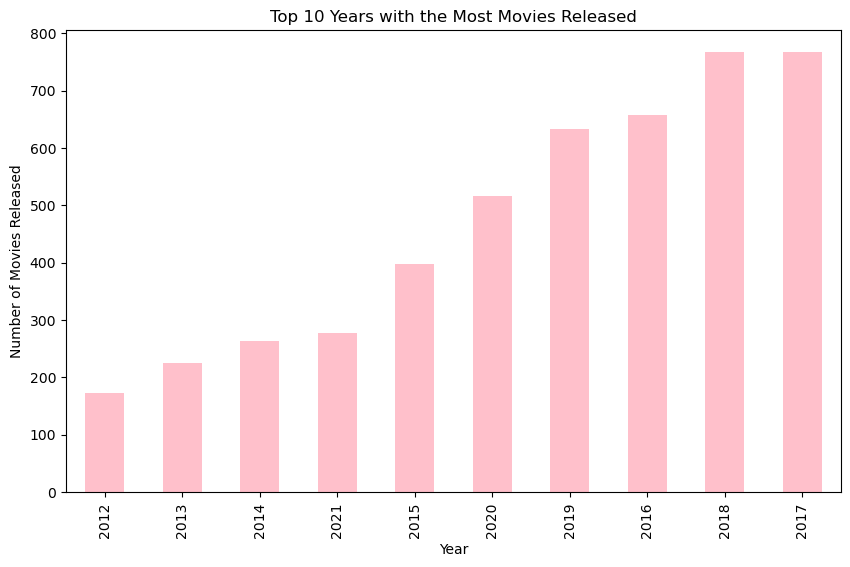

In [379]:
plt.figure(figsize=(10, 6))
movies_per_year.sort_values().plot(kind='bar', color='pink')
plt.title('Top 10 Years with the Most Movies Released')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=90)
plt.show()

In 2018 and 2017 highest movies were released

Q15. Display Top 5 Directors, who directed the highest number of TV Shows & Movies ? **(no explanation needed)**

In [383]:
top_5_directors = merged_movies['director'].value_counts().head(5)

In [385]:
top_5_directors

director
Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Name: count, dtype: int64

Q16. In how many movies/shows, Tom Cruise was casted? Display the records **(no explanation needed)**

In [388]:
tom_cruise_movies = merged_movies[merged_movies['cast'].str.contains('Tom Cruise', na=False)]

In [390]:
tom_cruise_movies.shape[0]

2

Q17. Create a distribution plot (histogram) for **ratings** TV-14 and TV-MA and **type** (Hint: use **x** for rating and **hue** for type) <br>
**(no explanation needed)**

In [393]:
filtered_data = merged_movies[merged_movies['rating'].isin(['TV-14', 'TV-MA'])]

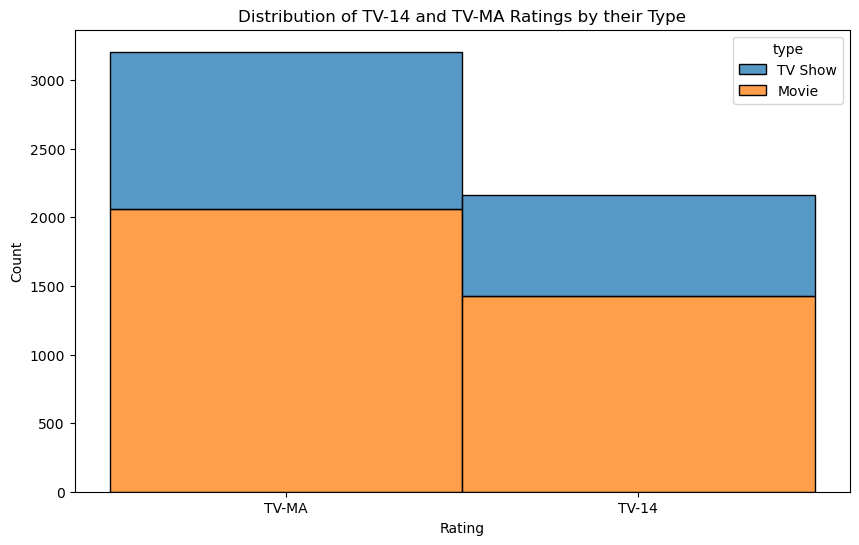

In [395]:
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x='rating', hue='type', multiple='stack', binwidth=0.5)
plt.title('Distribution of TV-14 and TV-MA Ratings by their Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Q18. Use a boxplot visualisation technique to see the highest, lowest and average **score** with the **type**? **Briefly explain your boxplot**

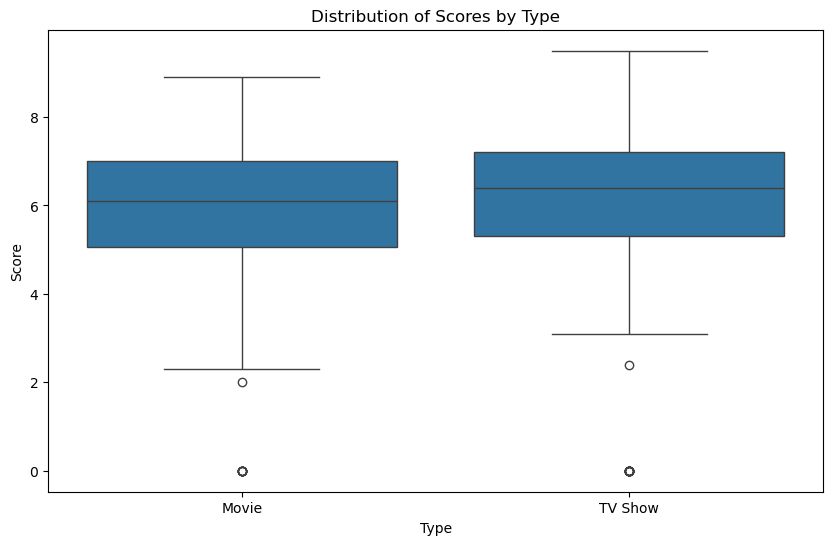

In [398]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_movies, x='type', y='score')
plt.title('Distribution of Scores by Type')
plt.xlabel('Type')
plt.ylabel('Score')
plt.show()

The boxplot demonstrates that the median score for TV series and films is near 6. Both types interquartile ranges are comparable, meaning that half of the scores fall between about 5 and 7. Compared to TV shows, films have a significantly larger range, with a few low outliers below 2. 

Q19. Use any visualization technique (think of any suitable plot) which can justify/show that "As the **score** increases, the **popularity** also increases proportionally". **Explain your findings in your plot**

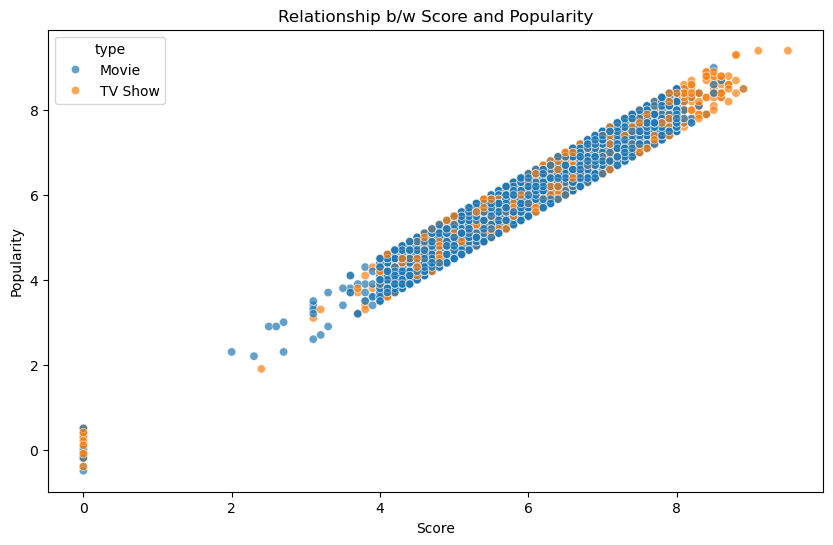

In [402]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_movies, x='score', y='popularity', hue='type', alpha=0.7)
plt.title('Relationship b/w Score and Popularity')
plt.xlabel('Score')
plt.ylabel('Popularity')
plt.show()

As the score increases, the popularity also rises proportionally, forming a linear pattern. This suggests that films and TV series with higher ratings are typically more popular, validating the link between public interest (popularity) and quality (scoring).

Q20. Generate a correlation plot between **score** and **popularity**. **Briefly explain your findings?**

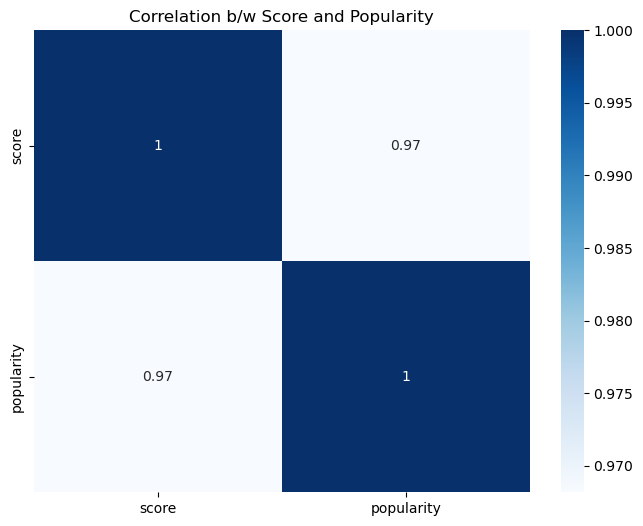

In [406]:
plt.figure(figsize=(8, 6))
sns.heatmap(merged_movies[['score', 'popularity']].corr(), annot=True, cmap='Blues')
plt.title('Correlation b/w Score and Popularity')
plt.show()

A strong positive connection of 0.97 is seen in the heatmap between score and popularity. This number suggests a strong linear association, which means that as the popularity of films or TV shows rises it usually does so at a faster rate. Stated differently, content with higher ratings tends to be more popular, indicating that higher ratings are positively correlated with more audience interest and engagement


Q21. Test the Hypothesis and explain your findings: <br> H0: the score of **type** = TV Show and **type** = Movie is same (equal or similar). <br>
Ha: the score of **type** = TV Show is greater than **type** = Movie <br>
**Briefly explain your conclusion**

In [260]:
tv_show_scores = merged_movies[merged_movies['type'] == 'TV Show']['score']

In [262]:
movie_scores = merged_movies[merged_movies['type'] == 'Movie']['score']

In [266]:
ttest_ind(tv_show_scores, movie_scores, alternative='greater')

TtestResult(statistic=7.393432583833722, pvalue=7.808967875701054e-14, df=8805.0)

This pvalue is much smaller than 0.05, we reject the null hypothesis, concluding that TV Shows have a higher average score compared to Movies.

Q22. Test the Hypothesis and explain your findings: <br> H0: **type** and **country** are independent and are not related to each other <br>
Ha: **type** and **country** are dependent and related to each other <br>
**Briefly explain your conclusion**

In [270]:
contingency_table = pd.crosstab(merged_movies['type'], merged_movies['country'])

In [280]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
p

6.511460628402202e-94

Since the pvalue is much less than 0.05, we reject the null hypothesis and accept alternative hypothesis, concluding that type and country are not independent and are. This means the distribution of TV Shows and Movies varies significantly depending on the country